# Nash-Q Learning Educational Software
This project aims to create an educational software that could be used by anyone interested in learning about artificial intelligence, specifically in the area of multi-agent systems and the Nash-Q learning algorithm.\n
The goal is to make the process that agents follow when applying the algorithm to explore a new environment more understandable. This includes showing how the agents' knowledge of the environment updates at every step, how they make decisions about what actions to take, and their final internal representation of the environment after training.

In this notebook, you can select a number of agents to train (between 1 and 4), and edit the environment where they will be trained, or chose one of the aviable presets. After that, it will be possible to run a training session for the agents, after setting the parameters for this phase. Following the training, the results will be displayed in a dedicated section.

## Table of Contents
1. Imports
2. Environment settings
3. Training
4. Results

## 1. Imports Needed for Using the Notebook
- %matplotlib widget is a magic function, used to enable the interactive Matplotlib backend for Jupiter notebooks
- Then it's possible to see the imports for the classes that define the environment where the training is held, with his widget and display, the implementation of the NashQ algorithm, and a final display used to show the results
- Next there is the imports for the widgets and the display, used to render the interfaces
- Lastly, the other two magic functions are used to automatically reload the Python kernel at every run, in order to get the updates from classes that have been eventually modified

In [1]:
%matplotlib widget

from Model.Environment import Environment
from Interface.Classes.GameEditor import EnvironmentWidget
from Interface.Classes.EnvGraphDisplay import EnvGraphDisplay
from Model.NashQLearning import *
from Interface.Classes.FinalDisplay import FinalDisplay

import ipywidgets as widgets
from IPython.display import display

# autoreload   
%load_ext autoreload
%autoreload 2

In [2]:
env = Environment()

games = env.getGames()

games[0].setPossibleActions(np.array([2, 2]))
#games[0].setPossibleActions((2, 2))
# print("–––––––––––")
# print(games[0])
games[0].setTransition((0, 0), 1, 1)
games[0].setPayoff((0, 0), np.array([1,1]))
# print("–––––––––––")
# print(games[0])
games[0].setTransition((1, 0), 0, 1)
games[0].setPayoff((1, 0), np.array([0,0]))
# print("–––––––––––")
# print(games[0])
games[0].setTransition((0, 1), 0, 1)
games[0].setPayoff((0, 1), np.array([0,0]))
# print("–––––––––––")
# print(games[0])
games[0].setTransition((1, 1), 0, 1)
games[0].setPayoff((1, 1), np.array([-1,-1]))
# print("–––––––––––")
# print(games[0])
###############################################

games[1].setPossibleActions(np.array([2, 2]))
#games[1].setPossibleActions((2, 2))
# print("–––––––––––")
# print(games[1])
games[1].setTransition((0, 0), 0, 1)
games[1].setPayoff((0, 0), np.array([1,1]))
# print("–––––––––––")
# print(games[1])

games[1].setTransition((1, 0), 1, 1)
games[1].setPayoff((1, 0), np.array([0,0]))
# print("–––––––––––")
# print(games[1])

games[1].setTransition((0, 1), 1, 1)
games[1].setPayoff((0, 1), np.array([0,0]))
# print("–––––––––––")
# print(games[1])

games[1].setTransition((1, 1), 1, 1)
games[1].setPayoff((1, 1), np.array([-1,-1]))
# print("–––––––––––")
# print(games[1])

## 2. Setting the Environment
The environment where the agents will be trained can be created using the following interface.
First of all, you need to chose the number of **players** (that is the number of agents), limited to 4 for reasons of complexity of representation, and the number of **games** (states that can be reached by the agents).  

When defining the number of states, the user should keep in mind its definition as: ***S*** = *s<sub>1</sub> x s<sub>2</sub> x ... x s<sub>i</sub>*, with *i* = 1, ..., n as the number of agents and *s<sub>i</sub>* as the state space for the *i-th* agent. This means that the state space is defined as the Cartesian product of the individual state spaces for every agent. Therefore, every state represents one of the combinations of positions of the agents, and the transitions between states always involve all the agents together.  

After setting the number of **players** and **games**, it is possible to define a global number of possible **actions**, equal for every **players** in every **game**, or different number of **actions** for each **player** in each **game**.  

Then, in every **game** defined, for every **action profile** *A* in the set of action profiles ***A*** = *a<sub>1</sub> x a<sub>2</sub> x ... x a<sub>i</sub>*, with *a<sub>i</sub>* set of possible actions for the *i-th* **player**, it is possible to set the **probability** of the transition towards all the **games** in the environment, along with the associated **payoff**.  

The graph below the settings interface shows the current state space and the possible transitions between states, with the associated **probability** or **reward**, depending on the option chosen.


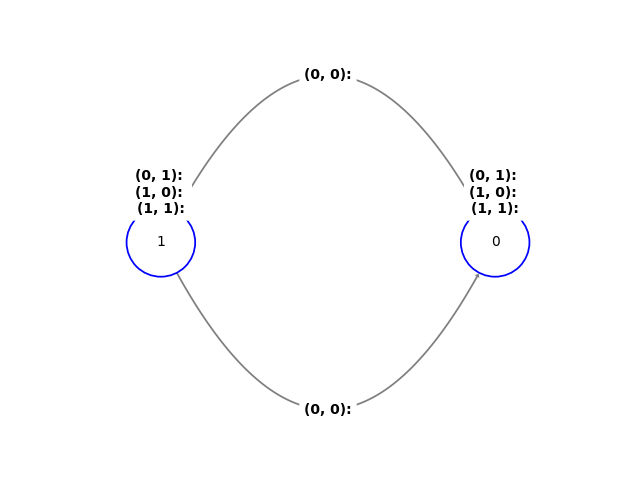

In [3]:
# env = Environment(2, 2)
# env.getGame(0).setTransition(tuple([0, 0]), 0, 1)

envWidget = EnvironmentWidget(env)
envGraph = EnvGraphDisplay(env)

vBox = widgets.VBox([envWidget.getWidget(), envGraph.get_widget()])
display(vBox)

## 3. Training of the agents ##
In the following section, it will be possible to set the parameters for the trainig phase.  
The paramethers that can be personalized are the following:
- *Episodes*: number of training episodes
- *Epsilon*: **exploration-exploitation** paramether, defined as the probability with which the algorithm choses a random action (exploration) over the best possible action (exploitation)
- *Alfa*

In [4]:
nashQLearning = NashQLearning(env)
display(nashQLearning.getDisplayable())

GridBox(children=(IntText(value=1, description='Episodes:'), FloatText(value=0.9, description='Gamma:'), Float…

## 4. Displaying the results ##

In [5]:
finalDisplay = FinalDisplay(nashQLearning, env)
display(finalDisplay.get_widget())